In [1]:
import pandas as pd
import json
import numpy as np

import matplotlib.pyplot as plt
from ast import literal_eval
from dotenv import load_dotenv 
import os
from PIL import Image

import write_latex as WL

In [2]:
# loading variables from .env file
load_dotenv("../../../private_data/.env") 

# PARENT gets us to the root of the project
PARENT = "./../../../"

FOLDER_TABLE = PARENT + os.getenv("FOLDER_TABLE")
FILE_FABRITIUS_DATA = PARENT + os.getenv("FILE_FABRITIUS_DATA")
FILE_FABRITIUS_DATA_FILTERED = PARENT + os.getenv("FILE_FABRITIUS_DATA_FILTERED")
FILE_FABRITIUS_DATA_FILTERED_DOWNLOADED = PARENT + os.getenv("FILE_FABRITIUS_DATA_FILTERED_DOWNLOADED")
FOLDER_FIGURES = PARENT + os.getenv("FOLDER_FIGURES")
IMAGES_FOLDER = PARENT + os.getenv("IMAGES_FOLDER")

RECORD_IDS_TESTING_SET = PARENT + os.getenv("RECORD_IDS_TESTING_SET")
RECORD_IDS_VALIDATION_SET = PARENT + os.getenv("RECORD_IDS_VALIDATION_SET")
RECORD_IDS_TRAINING_SET = PARENT + os.getenv("RECORD_IDS_TRAINING_SET")

WRITTEN_CAPTIONS_TESTING_SET = PARENT + os.getenv("WRITTEN_CAPTIONS_TESTING_SET")
WRITTEN_CAPTIONS_VALIDATION_SET = PARENT + os.getenv("WRITTEN_CAPTIONS_VALIDATION_SET")
WRITTEN_CAPTIONS_TRAINING_SET = PARENT + os.getenv("WRITTEN_CAPTIONS_TRAINING_SET")

DB_INPUT_ARTPIECES = PARENT + os.getenv("DB_INPUT_ARTPIECES")
DB_INPUT_ARTISTS = PARENT + os.getenv("DB_INPUT_ARTISTS")

BENCHMARK_1 = PARENT + os.getenv("BENCHMARK_1")

BENCHMARK_2_ATTACHED = PARENT + os.getenv("BENCHMARK_2_ATTACHED")
BENCHMARK_2_EXPLODED = PARENT + os.getenv("BENCHMARK_2_EXPLODED")

In [3]:
def fixPath(path):
    return path.replace(".././", "../")

filtered_data_downloaded = pd.read_csv(FILE_FABRITIUS_DATA_FILTERED_DOWNLOADED)

def get_image_path_from_recordID(recordID):
    """
    Given a recordID, return the local path for its image.
    """
    # Locate row in the downloaded DataFrame
    paths = filtered_data_downloaded[
        filtered_data_downloaded["recordID"] == recordID
    ]["low_res_filename"].values
    
    if len(paths) == 0:
        return None
    
    path = paths[0]
    # Merge: IMAGES_FOLDER + path[1:]
    merged_path = fixPath(os.path.join(IMAGES_FOLDER, path[1:]))
    return merged_path

In [4]:
# Get the artworks data
ARTWORKS = pd.read_csv(DB_INPUT_ARTPIECES)
ARTWORKS

,recordID,workID,creatorID,language,title,objectWorkType,termClassification,materials,signatureFullDescription,creationFullDescription,...,physicalAppearanceDescription,imageType,imageColor,imageLowResFilename,imageHighResFilename,imageCopyright,formalDescriptionTermStylesPeriods,height,width,ratio
0,64,8181,Auth:509:309,fre,La Crucifixion,détrempe,peinture (Dept. Art Ancien),toile|tempera,NaN,1460.0,...,Tempera sur toile,digitale JPG,photo couleurs,/art-foto/old/internet/Bouts-8181dig-L.jpg,/art-foto/old/intranet/Bouts-8181dig-H.jpg,NaN,Primitifs flamands,181.5,153.5,0.845730
1,77,11120,Auth:509:255,fre,Jeune fille assise,dessin,oeuvre sur papier (Dept. Art Moderne),papier|carton|colle|crayon|pastel,Signature dans la bas à droite : Gust. De Smet,1929.0,...,Crayon et pastel sur papier collé sur carton,digitale JPG,photo couleurs,/art-foto/mod/Internet/deSmet-11120dig-L.jpg,/art-foto/mod/Intranet/deSmet-11120dig-H.jpg,NaN,NaN,NaN,NaN,NaN
2,78,3980,Auth:509:70,fre,Portrait de Mademoiselle Van der Hecht,tableau (toile),peinture (Dept. Art Moderne),toile|peinture à l'huile,Signature et date dans le haut à droite: FERNA...,1883.0,...,Huile sur toile,digitale JPG,photo couleurs,/art-foto/mod/Internet/Khnopff-3980dig-L.jpg,/art-foto/mod/Intranet/Khnopff-3980dig-H.jpg,NaN,Peinture de portraits,37.0,29.0,0.783784
3,79,6366,Auth:509:70,fre,En écoutant du Schumann,tableau (toile),peinture (Dept. Art Moderne),toile|peinture à l'huile,Signature et date dans le haut vers la gauche ...,1883.0,...,Huile sur toile,digitale JPG,photo couleurs,/art-foto/mod/Internet/Khnopff-6366dig-L.jpg,/art-foto/mod/Intranet/Khnopff-6366dig-H.jpg,NaN,NaN,101.5,116.5,1.147783
4,80,6768,Auth:509:70,fre,Des caresses,tableau (toile),peinture (Dept. Art Moderne),toile|peinture à l'huile,Signature et date en bas à droite : FERNAND KH...,1896.0,...,Huile sur toile,digitale JPG,photo couleurs,/art-foto/mod/Internet/Khnopff-6768dig-L.jpg,/art-foto/mod/Intranet/Khnopff-6768dig-H.jpg,NaN,Symbolisme,50.5,151.0,2.990099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5296,13322,11972,Auth:509:82,fre,Page de carnet de croquis,dessin,oeuvre sur papier (Dept. Art Moderne),papier|fusain|crayon,NaN,NaN,...,Crayon et fusain sur papier,digitale JPG,photo couleurs,/art-foto/mod/internet/Meunier-11972r-L.jpg,/art-foto/mod/intranet/Meunier-11972r-H.jpg,NaN,NaN,NaN,NaN,NaN
5297,13323,11973,Auth:509:4126,fre,Lot de 12 oeuvres documentaires (11 dessins + ...,dessin,oeuvre sur papier (Dept. Art Moderne),papier,NaN,NaN,...,Techniques diverses sur feuilles de carnet de ...,digitale JPG,photo couleurs,/art-foto/mod/internet/Meunier-11973_1-L.jpg,/art-foto/mod/intranet/Meunier-11973_1-H.jpg,NaN,NaN,NaN,NaN,NaN
5298,13377,3399,Auth:509:1442,fre,Portrait de femme. Mademoiselle Collyns,pastel,oeuvre sur papier (Dept. Art Moderne),papier|pastel|carton,Signature et date vers le bas à droite : Eugèn...,1897.0,...,Pastel sur papier collé sur carton,digitale JPG,photo couleurs,/art-foto/mod/internet/Devaux-3399-L.jpg,/art-foto/mod/intranet/Devaux-3399-H.jpg,NaN,NaN,NaN,NaN,NaN
5299,13379,4787,Auth:509:85,fre,Mère et enfant,dessin,oeuvre sur papier (Dept. Art Moderne),papier|fusain|carton,"Non signé, non daté",NaN,...,"Fusain sur papier, collé sur carton",digitale JPG,photo couleurs,/art-foto/mod/internet/Minne-4787-L.jpg,/art-foto/mod/intranet/Minne-4787-H.jpg,NaN,NaN,NaN,NaN,NaN


In [5]:
# Get the artworks data
ARTISTS = pd.read_csv(DB_INPUT_ARTISTS)
ARTISTS.head(1)

,creatorID,creatorLastName,creatorFirstName,creatorBirthAndDeathDescription,creatorNationality,creatorDeathDate,creatorBirthDate
0,Auth:509:309,Bouts,Dirk,Haarlem (Pays-Bas) vers 1410 ? - Louvain 1475,NaN,1475.0,1410.0


In [6]:
def v_literal_eval(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError):
        return np.nan

In [7]:
BENCHMARK_1_DATA = pd.read_csv(BENCHMARK_1, converters={'additional_info_fr': v_literal_eval, 'additional_info_en': v_literal_eval, 'additional_info_nl': v_literal_eval})
BENCHMARK_1_DATA.head(2)

,recordID,category,focus,caption_fr,caption_en,caption_nl,additional_info_fr,additional_info_en,additional_info_nl,tokenized_length_fr,tokenized_length_en,tokenized_length_nl
0,10869,Dessin,colors,Un prêtre prononce un sermon les mains écartée...,A priest delivers a sermon with his hands apar...,Een priester geeft een preek met zijn handen u...,"[Bicolore, Couleur rouge]","[Bicolor, Red color]","[Bicolor, Rode kleur]",33,22,38
1,6146,Tableau,colors,"Un homme, contre une charette, une femme assis...","A man, against a charette, a woman sitting on ...","Een man, tegen een charette, een vrouw die op ...","[Couleurs vives, Couleur verte]","[Bright colors, Green color]","[Heldere kleuren, Groene kleur]",45,34,47


In [8]:
BENCHMARK_2_EXPLODED = pd.read_csv(BENCHMARK_2_EXPLODED, converters={'recordID': v_literal_eval})
BENCHMARK_2_EXPLODED.head(2)

,proper_nouns,recordID
0,Aar,[8437]
1,Ab Urbe Condita,[1369]


In [9]:
BENCHMARK_2_ATTACHED = pd.read_csv(BENCHMARK_2_ATTACHED)
BENCHMARK_2_ATTACHED.head(2)

,recordID,proper_nouns,tokenized_length
0,64,"Jésus, Nouveau Testament, Passion, Evangiles, ...",31
1,78,Louise van der Hecht,7


In [10]:
BENCHMARK_1_ARTWORKS_IDS = sorted(list(BENCHMARK_1_DATA['recordID'].unique()))
len(BENCHMARK_1_ARTWORKS_IDS)

454

In [11]:
BENCHMARK_2_ATTACHED_ARTWORKS_IDS = set()
for recordID in BENCHMARK_2_ATTACHED["recordID"]:
    BENCHMARK_2_ATTACHED_ARTWORKS_IDS.add(recordID)

BENCHMARK_2_ATTACHED_ARTWORKS_IDS = sorted(list(BENCHMARK_2_ATTACHED_ARTWORKS_IDS))

BENCHMARK_2_EXPLODED_ARTWORKS_IDS = set()
for recordIDs in BENCHMARK_2_EXPLODED["recordID"]:
    for recordID in recordIDs:
        BENCHMARK_2_EXPLODED_ARTWORKS_IDS.add(recordID)
BENCHMARK_2_EXPLODED_ARTWORKS_IDS = sorted(list(BENCHMARK_2_EXPLODED_ARTWORKS_IDS))

# Merge them together
BENCHMARK_2_ARTWORKS_IDS = BENCHMARK_2_ATTACHED_ARTWORKS_IDS + BENCHMARK_2_EXPLODED_ARTWORKS_IDS
BENCHMARK_2_ARTWORKS_IDS = sorted(list(set(BENCHMARK_2_ARTWORKS_IDS)))

len(BENCHMARK_2_ATTACHED_ARTWORKS_IDS), len(BENCHMARK_2_EXPLODED_ARTWORKS_IDS), len(BENCHMARK_2_ARTWORKS_IDS)

(1901, 1905, 1905)

# Select model

In [12]:
model_name = "february_finetuned"
baseline_name = "basic-base"

model_name = "march_finetuned"
baseline_name = "february_finetuned"

model_name = "art-base"
baseline_name = "march_finetuned"
fbaseline_name = "basic-base"

figures_path = os.path.join(FOLDER_FIGURES, model_name)
if not os.path.exists(figures_path):
    os.makedirs(figures_path)

In [13]:
lang_to_label = {
    "fr": "French",
    "en": "English", 
    "nl": "Dutch"
}
roundFactor = 4
langs_sorted = list(lang_to_label.keys())
print(langs_sorted)

['fr', 'en', 'nl']


In [14]:
def orderLangs(df, langColumn):
    # Order the languages in the DataFrame according to the langColumn
    # The order is: fr, en, nl
    df[langColumn] = pd.Categorical(df[langColumn], categories=langs_sorted, ordered=True)
    df = df.sort_values(by=langColumn)
    return df

# Load data

#### Benchmark 1

In [15]:
import pickle

fbaseline_name

benchmark1_fbaseline = {}
benchmark1_fbaseline = {}
benchmark1_fbaseline["metrics"] = pd.read_csv(f"../../benchmarks/benchmark_1/{fbaseline_name}_benchmark.csv")
benchmark1_fbaseline["metrics"] = orderLangs(benchmark1_fbaseline["metrics"], "lang")
benchmark1_fbaseline["positions"] = {
    "-PROMPT": pickle.load(open(f"../../benchmarks/benchmark_1/{fbaseline_name}_positions_prompt.pkl", "rb")),
    "-MIXED": pickle.load(open(f"../../benchmarks/benchmark_1/{fbaseline_name}_positions_mixed.pkl", "rb")),
}

benchmark1_baseline = {}
benchmark1_baseline = {}
benchmark1_baseline["metrics"] = pd.read_csv(f"../../benchmarks/benchmark_1/{baseline_name}_benchmark.csv")
benchmark1_baseline["metrics"] = orderLangs(benchmark1_baseline["metrics"], "lang")
benchmark1_baseline["positions"] = {
    "-PROMPT": pickle.load(open(f"../../benchmarks/benchmark_1/{baseline_name}_positions_prompt.pkl", "rb")),
    "-MIXED": pickle.load(open(f"../../benchmarks/benchmark_1/{baseline_name}_positions_mixed.pkl", "rb")),
}

benchmark1 = {}
benchmark1["metrics"] = pd.read_csv(f"../../benchmarks/benchmark_1/{model_name}_benchmark.csv")
benchmark1["metrics"] = orderLangs(benchmark1["metrics"], "lang")
benchmark1["positions"] = {
    "-PROMPT": pickle.load(open(f"../../benchmarks/benchmark_1/{model_name}_positions_prompt.pkl", "rb")),
    "-MIXED": pickle.load(open(f"../../benchmarks/benchmark_1/{model_name}_positions_mixed.pkl", "rb")),
}

benchmark1["metrics"]

,variant,lang,focus,average_position,mrr,recall@1,recall@3,recall@5,recall@10,nDCG@1,nDCG@3,nDCG@5,nDCG@10
4,-PROMPT,fr,colors,2.768722,0.778216,0.667401,0.870044,0.927313,0.962555,0.667401,0.786891,0.810397,0.822039
5,-PROMPT,fr,content,2.497797,0.778486,0.667401,0.863436,0.914097,0.962555,0.667401,0.785318,0.806171,0.822161
6,-PROMPT,fr,emotion,2.737885,0.771299,0.660793,0.854626,0.911894,0.953744,0.660793,0.776743,0.800539,0.814339
7,-PROMPT,fr,luminosity,2.781938,0.758006,0.640969,0.856828,0.900881,0.955947,0.640969,0.768798,0.786998,0.804634
17,-MIXED,fr,luminosity,3.651982,0.710412,0.585903,0.799559,0.856828,0.927313,0.585903,0.713207,0.737196,0.760329
16,-MIXED,fr,emotion,5.057269,0.612324,0.477974,0.678414,0.775330,0.881057,0.477974,0.597516,0.637808,0.672031
15,-MIXED,fr,colors,4.370044,0.719754,0.607930,0.799559,0.865639,0.918502,0.607930,0.720183,0.747869,0.765150
0,-PROMPT,en,colors,1.770925,0.846736,0.757709,0.925110,0.964758,0.982379,0.757709,0.857848,0.874248,0.879690
1,-PROMPT,en,content,1.667401,0.851465,0.764317,0.927313,0.958150,0.986784,0.764317,0.861965,0.874860,0.884362
2,-PROMPT,en,emotion,1.762115,0.834438,0.735683,0.933921,0.953744,0.984581,0.735683,0.852682,0.861027,0.871084


In [16]:
def compute_means(df):
    if "mean" not in df["focus"].unique():
        for variant in df["variant"].unique():
            df_variant = df[df["variant"] == variant]
            for lang in df_variant["lang"].unique():
                df_variant_lang = df_variant[df_variant["lang"] == lang]
                df.loc[len(df)] = [
                    variant,
                    lang,
                    "mean",
                    df_variant_lang["average_position"].mean(),
                    df_variant_lang["mrr"].mean(),
                    df_variant_lang["recall@1"].mean(),
                    df_variant_lang["recall@3"].mean(),
                    df_variant_lang["recall@5"].mean(),
                    df_variant_lang["recall@10"].mean(),
                    df_variant_lang["nDCG@1"].mean(),
                    df_variant_lang["nDCG@3"].mean(),
                    df_variant_lang["nDCG@5"].mean(),
                    df_variant_lang["nDCG@10"].mean(),
                ]

compute_means(benchmark1_fbaseline["metrics"])
compute_means(benchmark1_baseline["metrics"])
compute_means(benchmark1["metrics"])

In [17]:
benchmark1_fbaseline["metrics"].loc[benchmark1_fbaseline["metrics"]["focus"] == "mean"]

,variant,lang,focus,average_position,mrr,recall@1,recall@3,recall@5,recall@10,nDCG@1,nDCG@3,nDCG@5,nDCG@10
21,-PROMPT,fr,mean,12.978524,0.447504,0.306167,0.512665,0.616189,0.743392,0.306167,0.425350,0.468029,0.509392
22,-PROMPT,en,mean,3.731828,0.689840,0.563326,0.774229,0.852423,0.920705,0.563326,0.687956,0.720377,0.742619
23,-PROMPT,nl,mean,39.612885,0.268485,0.167401,0.286894,0.367841,0.488436,0.167401,0.235367,0.268564,0.307583
24,-MIXED,fr,mean,33.143172,0.294652,0.193833,0.312775,0.380323,0.502937,0.193833,0.263109,0.291042,0.330902
25,-MIXED,en,mean,9.097651,0.536796,0.402349,0.609398,0.704846,0.813510,0.402349,0.522312,0.561617,0.596564
26,-MIXED,nl,mean,70.828194,0.152992,0.074156,0.157856,0.215859,0.307636,0.074156,0.121678,0.145403,0.174748


In [18]:
benchmark1_baseline["metrics"].loc[benchmark1_baseline["metrics"]["focus"] == "mean"]

,variant,lang,focus,average_position,mrr,recall@1,recall@3,recall@5,recall@10,nDCG@1,nDCG@3,nDCG@5,nDCG@10
21,-PROMPT,fr,mean,2.928965,0.756289,0.639868,0.850220,0.903084,0.951542,0.639868,0.764510,0.786433,0.802164
22,-PROMPT,en,mean,1.938326,0.817353,0.715859,0.909692,0.946586,0.977974,0.715859,0.830439,0.845798,0.856156
23,-PROMPT,nl,mean,17.357930,0.445700,0.316079,0.505507,0.593612,0.718062,0.316079,0.425501,0.461612,0.501620
24,-MIXED,fr,mean,4.256975,0.669737,0.532305,0.770191,0.838473,0.914097,0.532305,0.672878,0.700998,0.725878
25,-MIXED,en,mean,2.891336,0.738823,0.619677,0.828194,0.884728,0.949339,0.619677,0.743258,0.766447,0.787931
26,-MIXED,nl,mean,27.312775,0.343388,0.218796,0.390602,0.483847,0.596916,0.218796,0.317388,0.355713,0.392370


In [19]:
benchmark1["metrics"].loc[benchmark1["metrics"]["focus"] == "mean"]

,variant,lang,focus,average_position,mrr,recall@1,recall@3,recall@5,recall@10,nDCG@1,nDCG@3,nDCG@5,nDCG@10
21,-PROMPT,fr,mean,2.696586,0.771502,0.659141,0.861233,0.913546,0.958700,0.659141,0.779437,0.801026,0.815793
22,-PROMPT,en,mean,1.759361,0.841485,0.749449,0.925110,0.956498,0.983480,0.749449,0.854151,0.867162,0.875941
23,-PROMPT,nl,mean,5.307819,0.662497,0.535793,0.752753,0.821586,0.904185,0.535793,0.662009,0.690278,0.717176
24,-MIXED,fr,mean,4.359765,0.680830,0.557269,0.759178,0.832599,0.908957,0.557269,0.676969,0.707624,0.732503
25,-MIXED,en,mean,2.933921,0.740228,0.625551,0.824523,0.893539,0.949339,0.625551,0.742340,0.770809,0.789016
26,-MIXED,nl,mean,9.096182,0.561993,0.429515,0.635095,0.726872,0.823789,0.429515,0.549705,0.587268,0.618637


##### 1) Formatted table

In [20]:
benchmark1_table = benchmark1["metrics"].loc[benchmark1["metrics"]["focus"] == "mean"].copy()
# Drop the colums (focus)
benchmark1_table = benchmark1_table.drop(columns=["focus", "nDCG@1"])
# Rename the columns
benchmark1_table = benchmark1_table.rename(
    columns={
        "variant": "Benchmark variant",
        "lang": "Language",
        "average_position": "Avg. Position",
        "mrr": "MRR",
        "recall@1": "Recall@1",
        "recall@3": "Recall@3",
        "recall@5": "Recall@5",
        "recall@10": "Recall@10",
        "nDCG@3": "nDCG@3",
        "nDCG@5": "nDCG@5",
        "nDCG@10": "nDCG@10",
    }
)


roundColumns = [
    "Avg. Position",
    "MRR",
    "Recall@1",
    "Recall@3",
    "Recall@5",
    "Recall@10",
    "nDCG@3",
    "nDCG@5",
    "nDCG@10",
]
for col in roundColumns:
    benchmark1_table[col] = benchmark1_table[col].apply(lambda x: round(x, roundFactor))

# For each column that we round, bold the best value
for col in roundColumns:
    if col == "Avg. Position":
        benchmark1_table[col] = benchmark1_table[col].apply(
            lambda x: f"\\textbf{{{x}}}" if x == benchmark1_table[col].min() else x
        )
    else:
        benchmark1_table[col] = benchmark1_table[col].apply(
            lambda x: f"\\textbf{{{x}}}" if x == benchmark1_table[col].max() else x
        )

benchmark1_table["Language"] = benchmark1_table["Language"].map(lang_to_label)
benchmark1_table.to_csv(
    os.path.join(figures_path, "benchmark_1_mean_table.csv"),
    index=False,
    header=True
)
print(WL.get_benchmark_1_table(benchmark1_table))


        \begin{table}[h]
        \centering
        \resizebox{\columnwidth}{!}{%
        \begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|}
        \hline
        \textbf{Benchmark variant} & \textbf{Language} & \textbf{Avg. Position} & \textbf{MRR} & \textbf{Recall@1} & \textbf{Recall@3} & \textbf{Recall@5} & \textbf{Recall@10} & \textbf{nDCG@3} & \textbf{nDCG@5} & \textbf{nDCG@10} \\ \hline
        -PROMPT & French & 2.6966 & 0.7715 & 0.6591 & 0.8612 & 0.9135 & 0.9587 & 0.7794 & 0.801 & 0.8158 \\ \hline
-PROMPT & English & \textbf{1.7594} & \textbf{0.8415} & \textbf{0.7494} & \textbf{0.9251} & \textbf{0.9565} & \textbf{0.9835} & \textbf{0.8542} & \textbf{0.8672} & \textbf{0.8759} \\ \hline
-PROMPT & Dutch & 5.3078 & 0.6625 & 0.5358 & 0.7528 & 0.8216 & 0.9042 & 0.662 & 0.6903 & 0.7172 \\ \hline
-MIXED & French & 4.3598 & 0.6808 & 0.5573 & 0.7592 & 0.8326 & 0.909 & 0.677 & 0.7076 & 0.7325 \\ \hline
-MIXED & English & 2.9339 & 0.7402 & 0.6256 & 0.8245 & 0.8935 & 0.9493 & 0.7423 & 0.7708 & 0.7

##### 2) Improvement per lang of MRR

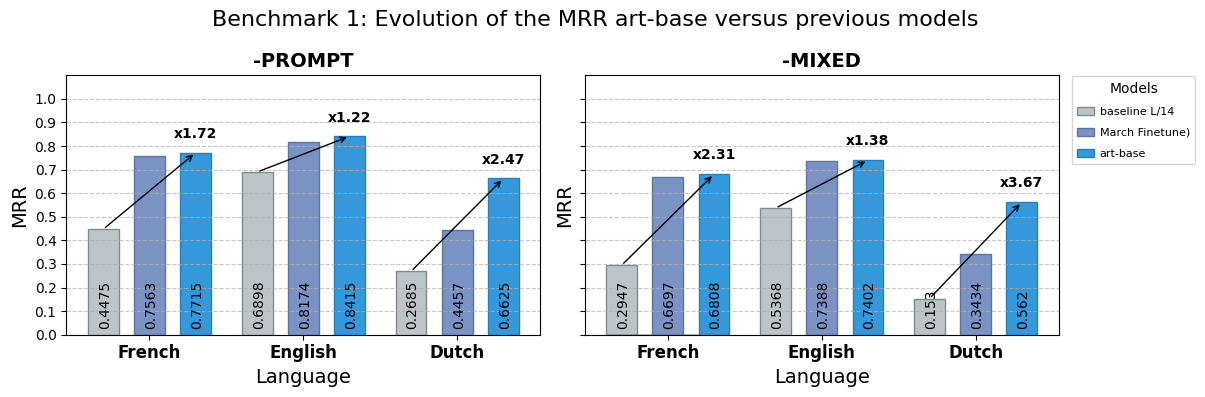

In [21]:
# Reorder the columns model_name such that it follows the order in models_name
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)


for variantIndex, variant in enumerate(["-PROMPT", "-MIXED"]):
    ax = axs[variantIndex]
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    for langIndex, lang in enumerate(lang_to_label.keys()):

        # Get the data for the current variant and language
        fbase_result = benchmark1_fbaseline["metrics"].loc[
            (benchmark1_fbaseline["metrics"]["variant"] == variant)
            & (benchmark1_fbaseline["metrics"]["lang"] == lang)
            & (benchmark1_fbaseline["metrics"]["focus"] == "mean")
        ]["mrr"].values[0]

        base_result = benchmark1_baseline["metrics"].loc[
            (benchmark1_baseline["metrics"]["variant"] == variant)
            & (benchmark1_baseline["metrics"]["lang"] == lang)
            & (benchmark1_baseline["metrics"]["focus"] == "mean")
        ]["mrr"].values[0]

        art_result = benchmark1["metrics"].loc[
            (benchmark1["metrics"]["variant"] == variant)
            & (benchmark1["metrics"]["lang"] == lang)
            & (benchmark1["metrics"]["focus"] == "mean")
        ]["mrr"].values[0]

        # fbase
        ax.bar(
            langIndex - 0.3,
            fbase_result,
            width=0.2,
            color="#bdc3c7",
            edgecolor="#7f8c8d"
        )
        # Add the value at the bottom of the bar
        ax.text(
            langIndex - 0.3 + 0.01,
            0.025,
            str(round(fbase_result, roundFactor)),
            ha='center',
            va='bottom',
            fontsize=10,
            color="black",
            rotation=90
        )

        # base
        ax.bar(
            langIndex,
            base_result,
            width=0.2,
            color="#7a93c4",
            edgecolor="#607399"
        )
        # Add the value at the bottom of the bar
        ax.text(
            langIndex + 0.01,
            0.025,
            str(round(base_result, roundFactor)),
            ha='center',
            va='bottom',
            fontsize=10,
            color="black",
            rotation=90
        )

        ax.bar(
            langIndex + 0.3,
            art_result,
            width=0.2,
            color="#3498db",
            edgecolor="#2980b9"
        )
        # Add the value at the bottom of the bar
        ax.text(
            langIndex + 0.3 + 0.01,
            0.025,
            str(round(art_result, roundFactor)),
            ha='center',
            va='bottom',
            fontsize=10,
            color="black",
            rotation=90
        )

        # Add an arrow between fbase and base
        ax.annotate(
            "",
            xy=(langIndex + 0.3, art_result),
            xytext=(langIndex - 0.3, fbase_result),
            arrowprops=dict(arrowstyle="->", color="black"),
            fontsize=10,
            color="black",
        )
        # Add a text above the arrow
        xDifference = round(art_result/fbase_result, 2)
        xDifference = f"x{xDifference}"
        ax.text(
            langIndex + 0.3,
            art_result + 0.05,
            xDifference,
            ha='center',
            va='bottom',
            fontsize=10,
            color="#000000",
            fontweight='bold',
        )


    ax.set_xticks(
        np.arange(len(lang_to_label)),
        [lang_to_label[lang] for lang in lang_to_label.keys()],
        fontsize=12,
        fontweight='bold'
    )
    ax.set_xlabel("Language", fontsize=14)
    ax.set_ylim(0, 1.1)
    ax.set_ylabel("MRR", fontsize=14)
    ax.set_title(
        f"{variant}",
        fontsize=14,
        fontweight='bold'
    )

ax = axs[1]
ax.bar(0, 0, color="#bdc3c7", edgecolor="#7f8c8d", label="baseline L/14")
ax.bar(0, 0, color="#7a93c4", edgecolor="#607399", label="March Finetune)")
ax.bar(0, 0, color="#3498db", edgecolor="#2980b9", label="art-base")

ax.legend(
    loc="lower right",
    fontsize=8,
    title="Models",
    markerscale=1.5,
    handlelength=1.5,
    handletextpad=0.5,
    borderpad=0.5,
    labelspacing=1,
    bbox_to_anchor=(1.30, 0.635)
)

suptitle = f"Benchmark 1: Evolution of the MRR art-base versus previous models"

plt.suptitle(
    suptitle,
    fontsize=16,
)

y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)
plt.tight_layout()
plt.savefig(
    os.path.join(figures_path, "benchmark_1_mrr_tri.pdf"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()

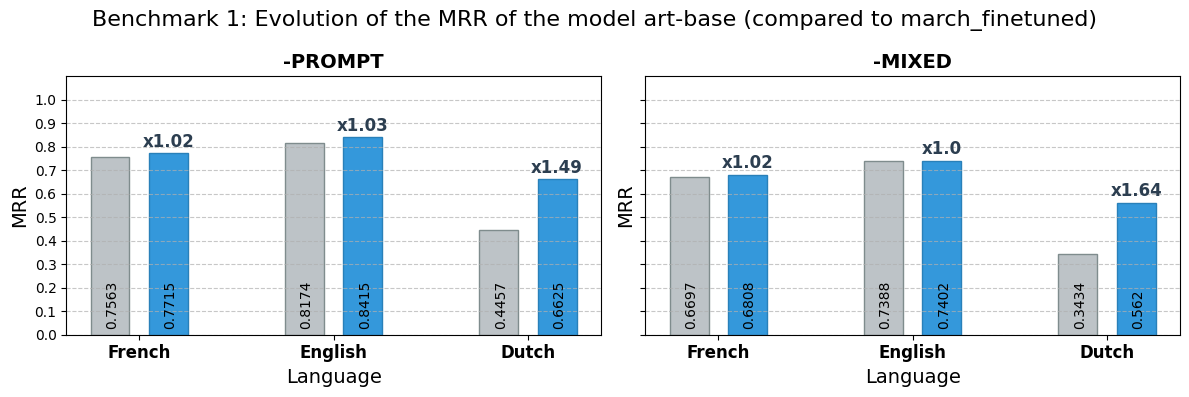

In [22]:
# Reorder the columns model_name such that it follows the order in models_name
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)


for variantIndex, variant in enumerate(["-PROMPT", "-MIXED"]):
    ax = axs[variantIndex]
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    for langIndex, lang in enumerate(lang_to_label.keys()):

        # Get the data for the current variant and language
        base_result = benchmark1_baseline["metrics"].loc[
            (benchmark1_baseline["metrics"]["variant"] == variant)
            & (benchmark1_baseline["metrics"]["lang"] == lang)
            & (benchmark1_baseline["metrics"]["focus"] == "mean")
        ]["mrr"].values[0]

        art_result = benchmark1["metrics"].loc[
            (benchmark1["metrics"]["variant"] == variant)
            & (benchmark1["metrics"]["lang"] == lang)
            & (benchmark1["metrics"]["focus"] == "mean")
        ]["mrr"].values[0]

        ax.bar(
            langIndex - 0.15,
            base_result,
            width=0.2,
            label=baseline_name,
            color="#bdc3c7",
            edgecolor="#7f8c8d"
        )
        # Add the value at the bottom of the bar
        ax.text(
            langIndex - 0.15 + 0.01,
            0.025,
            str(round(base_result, roundFactor)),
            ha='center',
            va='bottom',
            fontsize=10,
            color="black",
            rotation=90
        )

        ax.bar(
            langIndex + 0.15,
            art_result,
            width=0.2,
            label=model_name,
            color="#3498db",
            edgecolor="#2980b9"
        )
        # Add the value at the bottom of the bar
        ax.text(
            langIndex + 0.15 + 0.01,
            0.025,
            str(round(art_result, roundFactor)),
            ha='center',
            va='bottom',
            fontsize=10,
            color="black",
            rotation=90
        )

        # Add a text above the art_result bar
        xDifference = round(art_result/base_result, 2)
        xDifference = f"x{xDifference}"
        ax.text(
            langIndex + 0.15,
            art_result + 0.01,
            xDifference,
            ha='center',
            va='bottom',
            fontsize=12,
            color="#2c3e50",
            fontweight='bold'
        )

    ax.set_xticks(
        np.arange(len(lang_to_label)),
        [lang_to_label[lang] for lang in lang_to_label.keys()],
        fontsize=12,
        fontweight='bold'
    )
    ax.set_xlabel("Language", fontsize=14)
    ax.set_ylim(0, 1.1)
    ax.set_ylabel("MRR", fontsize=14)
    ax.set_title(
        f"{variant}",
        fontsize=14,
        fontweight='bold'
    )

suptitle = f"Benchmark 1: Evolution of the MRR of the model {model_name}"
if not "basic" in baseline_name:
    suptitle += f" (compared to {baseline_name})"

plt.suptitle(
    suptitle,
    fontsize=16,
)

y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)
plt.tight_layout()
plt.savefig(
    os.path.join(figures_path, "benchmark_1_mrr.pdf"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()

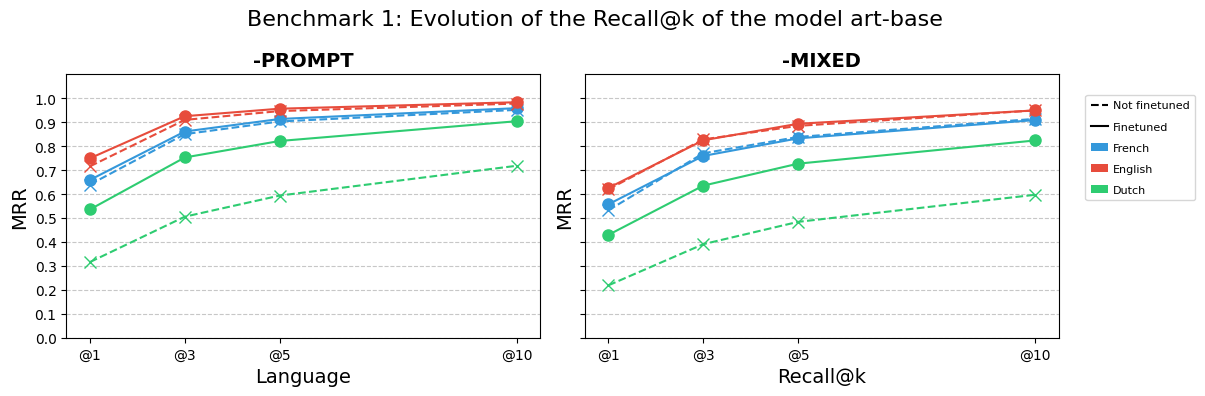

In [23]:
color_per_model_lang = {
    "fr": "#3498db",
    "en": "#e74c3c",
    "nl": "#2ecc71",
}

linestyle_per_finetuned = {
    True: "-",
    False: "--",
}

marker_per_finetuned = {
    True: "o",
    False: "x",
}

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

ymin = 0.0
ymax = 1.1

for variantIndex, variant in enumerate(["-PROMPT", "-MIXED"]):
    ax = axs[variantIndex]
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    for langIndex, lang in enumerate(lang_to_label.keys()):

        K = [1,3,5,10]
        baseline_values = []
        art_values = []
        for k in K:
            # Get the data for the current variant and language
            base_result = benchmark1_baseline["metrics"].loc[
                (benchmark1_baseline["metrics"]["variant"] == variant)
                & (benchmark1_baseline["metrics"]["lang"] == lang)
                & (benchmark1_baseline["metrics"]["focus"] == "mean")
            ][f"recall@{k}"].values[0]
            baseline_values.append(base_result)

            art_result = benchmark1["metrics"].loc[
                (benchmark1["metrics"]["variant"] == variant)
                & (benchmark1["metrics"]["lang"] == lang)
                & (benchmark1["metrics"]["focus"] == "mean")
            ][f"recall@{k}"].values[0]
            art_values.append(art_result)

        ax.plot(
            K,
            baseline_values,
            color=color_per_model_lang[lang],
            linestyle=linestyle_per_finetuned[False],
            marker=marker_per_finetuned[False],
            markersize=8,
        )


        ax.plot(
            K,
            art_values,
            color=color_per_model_lang[lang],
            linestyle=linestyle_per_finetuned[True],
            marker=marker_per_finetuned[True],
            markersize=8,
        )    

        ax.set_xlabel("Language", fontsize=14)
        ax.set_ylim(ymin, ymax)
        ax.set_ylabel("MRR", fontsize=14)
        ax.set_title(
            f"{variant}",
            fontsize=14,
            fontweight='bold'
        )

# Add legend to the first subplot
ax = axs[1]
ax.bar(0, 0, color=color_per_model_lang["fr"], label="French")
ax.bar(0, 0, color=color_per_model_lang["en"], label="English")
ax.bar(0, 0, color=color_per_model_lang["nl"], label="Dutch")
ax.plot(0, 0, color="black", linestyle="--", label="Not finetuned")
ax.plot(0, 0, color="black", linestyle="-", label="Finetuned")

ax.legend(
    loc="lower right",
    fontsize=8,
    markerscale=1.5,
    handlelength=1.5,
    handletextpad=0.5,
    borderpad=0.5,
    labelspacing=1,
    bbox_to_anchor=(1.30, 0.5)
)

A = 0.50
plt.xlim(1-A, 10+A)
plt.suptitle(
    f"Benchmark 1: Evolution of the Recall@k of the model {model_name}",
    fontsize=16,
)
plt.xticks(K, [f"@{recall}" for recall in K])
plt.ylim(ymin, ymax)

y_ticks = np.arange(ymin, ymax, 0.1)
plt.yticks(y_ticks)
plt.xlabel("Recall@k")
plt.ylabel("MRR")

plt.tight_layout()
plt.savefig(
    os.path.join(figures_path, "benchmark_1_recall_compare.pdf"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()

##### 3) Plot recall@k vs k

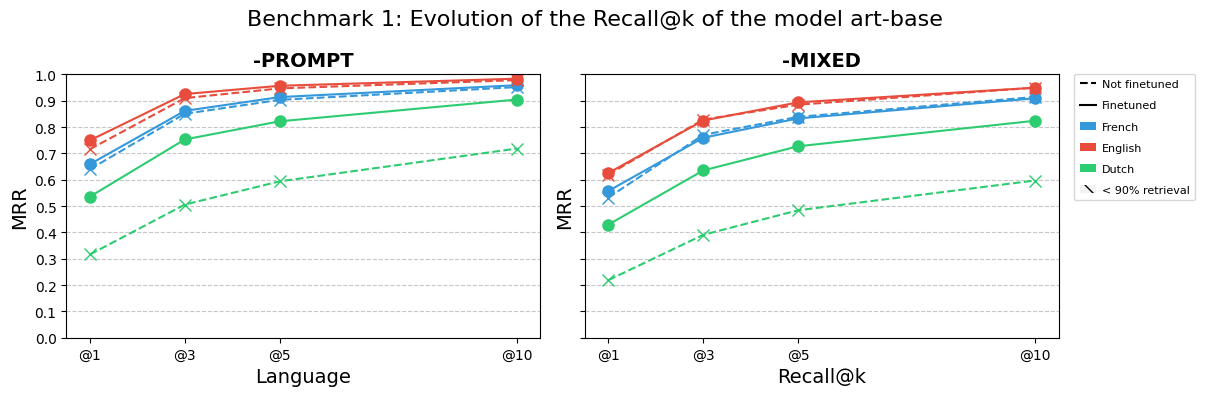

In [24]:
color_per_model_lang = {
    "fr": "#3498db",
    "en": "#e74c3c",
    "nl": "#2ecc71",
}

linestyle_per_finetuned = {
    True: "-",
    False: "--",
}

marker_per_finetuned = {
    True: "o",
    False: "x",
}

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)


for variantIndex, variant in enumerate(["-PROMPT", "-MIXED"]):
    ax = axs[variantIndex]
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    for langIndex, lang in enumerate(lang_to_label.keys()):

        K = [1,3,5,10]
        baseline_values = []
        art_values = []
        for k in K:
            # Get the data for the current variant and language
            base_result = benchmark1_baseline["metrics"].loc[
                (benchmark1_baseline["metrics"]["variant"] == variant)
                & (benchmark1_baseline["metrics"]["lang"] == lang)
                & (benchmark1_baseline["metrics"]["focus"] == "mean")
            ][f"recall@{k}"].values[0]
            baseline_values.append(base_result)

            art_result = benchmark1["metrics"].loc[
                (benchmark1["metrics"]["variant"] == variant)
                & (benchmark1["metrics"]["lang"] == lang)
                & (benchmark1["metrics"]["focus"] == "mean")
            ][f"recall@{k}"].values[0]
            art_values.append(art_result)

        ax.plot(
            K,
            baseline_values,
            color=color_per_model_lang[lang],
            linestyle=linestyle_per_finetuned[False],
            marker=marker_per_finetuned[False],
            markersize=8,
        )


        ax.plot(
            K,
            art_values,
            color=color_per_model_lang[lang],
            linestyle=linestyle_per_finetuned[True],
            marker=marker_per_finetuned[True],
            markersize=8,
        )    

        ax.set_xlabel("Language", fontsize=14)
        ax.set_ylim(0, 1.1)
        ax.set_ylabel("MRR", fontsize=14)
        ax.set_title(
            f"{variant}",
            fontsize=14,
            fontweight='bold'
        )

# Add legend to the first subplot
ax = axs[1]
ax.bar(0, 0, color=color_per_model_lang["fr"], label="French")
ax.bar(0, 0, color=color_per_model_lang["en"], label="English")
ax.bar(0, 0, color=color_per_model_lang["nl"], label="Dutch")
ax.plot(0, 0, color="black", linestyle="--", label="Not finetuned")
ax.plot(0, 0, color="black", linestyle="-", label="Finetuned")
ax.bar(0, 0, color="gray", alpha=0.1, hatch="\\", label="< 90% retrieval")

ax.legend(
    loc="lower right",
    fontsize=8,
    markerscale=1.5,
    handlelength=1.5,
    handletextpad=0.5,
    borderpad=0.5,
    labelspacing=1,
    bbox_to_anchor=(1.30, 0.5)
)

A = 0.50
plt.xlim(1-A, 10+A)
plt.suptitle(
    f"Benchmark 1: Evolution of the Recall@k of the model {model_name}",
    fontsize=16,
)
plt.xticks(K, [f"@{recall}" for recall in K])
plt.ylim(0, 1)

y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)
plt.xlabel("Recall@k")
plt.ylabel("MRR")

plt.tight_layout()
plt.savefig(
    os.path.join(figures_path, "benchmark_1_recall.pdf"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()

##### 4) How much additional information improved MRR

In [25]:
focuses = ["colors", "emotion", "luminosity"]
focuses_to_label = {
    "colors": "Colors",
    "emotion": "Emotion",
    "luminosity": "Luminosity"
}

improvement_with_additional_info = pd.DataFrame(columns=[
    "Variant",
    "Language",
    "Additional info",
    "MRR without info",
    "MRR with info",
    "Difference",
    "Difference (%)",
])

for variant in ["-PROMPT", "-MIXED"]:
    for lang in lang_to_label.keys():
        without_info_result = benchmark1["metrics"].loc[
            (benchmark1["metrics"]["variant"] == "-PROMPT")
            & (benchmark1["metrics"]["lang"] == lang)
            & (benchmark1["metrics"]["focus"] == "content")
        ]["mrr"].values[0]

        for focus in focuses:
            # Get the data for the current variant and language

            with_info_result = benchmark1["metrics"].loc[
                (benchmark1["metrics"]["variant"] == variant)
                & (benchmark1["metrics"]["lang"] == lang)
                & (benchmark1["metrics"]["focus"] == focus)
            ]["mrr"].values[0]

            improvement_with_additional_info.loc[len(improvement_with_additional_info)] = [
                variant,
                lang,
                focuses_to_label[focus],
                without_info_result,
                with_info_result,
                with_info_result - without_info_result,
                (with_info_result - without_info_result) / without_info_result * 100
            ]
improvement_with_additional_info

,Variant,Language,Additional info,MRR without info,MRR with info,Difference,Difference (%)
0,-PROMPT,fr,Colors,0.778486,0.778216,-0.000269,-0.034569
1,-PROMPT,fr,Emotion,0.778486,0.771299,-0.007187,-0.923170
2,-PROMPT,fr,Luminosity,0.778486,0.758006,-0.020480,-2.630721
3,-PROMPT,en,Colors,0.851465,0.846736,-0.004729,-0.555406
4,-PROMPT,en,Emotion,0.851465,0.834438,-0.017027,-1.999755
5,-PROMPT,en,Luminosity,0.851465,0.833300,-0.018165,-2.133438
6,-PROMPT,nl,Colors,0.662191,0.673865,0.011674,1.762986
7,-PROMPT,nl,Emotion,0.662191,0.654754,-0.007437,-1.123052
8,-PROMPT,nl,Luminosity,0.662191,0.659181,-0.003010,-0.454526
9,-MIXED,fr,Colors,0.778486,0.719754,-0.058731,-7.544307


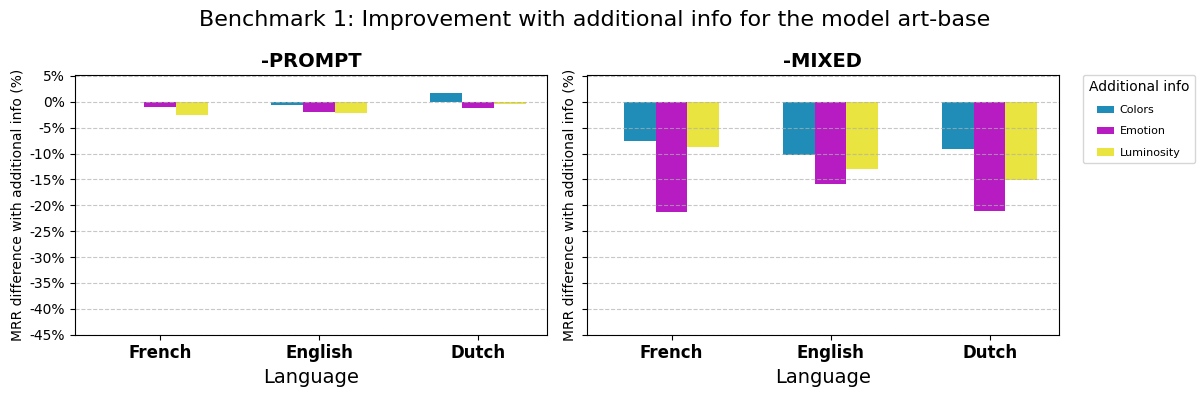

In [26]:
color_per_additional_info = {
    "colors": "#1F8DB8",
    "emotion": "#b61cc1",
    "luminosity": "#e9e43f"
}

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

for variantIndex, variant in enumerate(["-PROMPT", "-MIXED"]):
    ax = axs[variantIndex]
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    for langIndex, lang in enumerate(lang_to_label.keys()):

        fX = np.linspace(-0.20, 0.20, len(focuses))
        for focusIndex, focus in enumerate(focuses):
            color = color_per_additional_info[focus]
            improvement_with_additional_info_value = improvement_with_additional_info.loc[
                (improvement_with_additional_info["Variant"] == variant)
                & (improvement_with_additional_info["Language"] == lang)
                & (improvement_with_additional_info["Additional info"] == focuses_to_label[focus])
            ]["Difference (%)"].values[0]
            ax.bar(langIndex + fX[focusIndex], improvement_with_additional_info_value, color=color, width=0.2)

        ax.set_xlabel("Language", fontsize=14)
        ax.set_ylabel("MRR difference with additional info (%)", fontsize=10)
        ax.set_title(
            f"{variant}",
            fontsize=14,
            fontweight='bold'
        )
        ymin = -45
        ymax = 5.1
        step = 5
        ax.set_ylim(ymin, ymax)
        ax.set_yticks(
            np.arange(ymin, ymax, step),
            [f"{int(round(x, 0))}%" for x in np.arange(ymin, ymax, step)],
            fontsize=10,
        )
        ax.set_xticks(
            np.arange(len(lang_to_label)),
            [lang_to_label[lang] for lang in lang_to_label.keys()],
            fontsize=12,
            fontweight='bold'
        )

# Add legend to the first subplot
ax = axs[1]
ax.bar(0, 0, color=color_per_additional_info["colors"], label="Colors")
ax.bar(0, 0, color=color_per_additional_info["emotion"], label="Emotion")
ax.bar(0, 0, color=color_per_additional_info["luminosity"], label="Luminosity")

ax.legend(
    loc="lower right",
    title="Additional info",
    title_fontsize=10,
    fontsize=8,
    markerscale=1.5,
    handlelength=1.5,
    handletextpad=0.5,
    borderpad=0.5,
    labelspacing=1,
    bbox_to_anchor=(1.30, 0.64)
)

plt.suptitle(
    f"Benchmark 1: Improvement with additional info for the model {model_name}",
    fontsize=16,
)

plt.tight_layout()
plt.savefig(
    os.path.join(figures_path, "benchmark_1_additional_info.pdf"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()

##### 5) Positions boxplot per variant per category

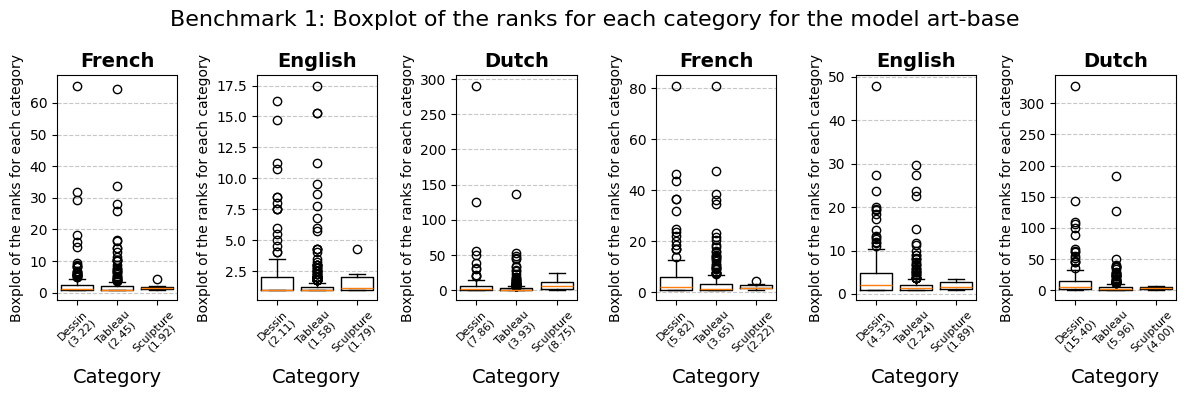

In [27]:
color_per_category = {
    "Dessin": "#3794c5",
    "Tableau": "#11653a",
    "Sculpture": "#986517",
}

categories = list(BENCHMARK_1_DATA["category"].unique())

category_to_indexes = {}
for category in categories:
    recordIDs_with_category = set(BENCHMARK_1_DATA[BENCHMARK_1_DATA["category"] == category]["recordID"].values)
    category_to_indexes[category] = []
    for recordID in recordIDs_with_category:
        category_to_indexes[category].append(BENCHMARK_1_ARTWORKS_IDS.index(recordID))


fig, axs = plt.subplots(1, 6, figsize=(12, 4))

for variantIndex, variant in enumerate(["-PROMPT", "-MIXED"]):

    if variant == "-PROMPT":
        focuses = ["content", "colors", "emotion", "luminosity"]
    else:
        focuses = ["colors", "emotion", "luminosity"]

    for langIndex, lang in enumerate(lang_to_label.keys()):

        ax = axs[variantIndex*3 + langIndex]
        ax.grid(axis='y', linestyle='--', alpha=0.7)


        # Get the ranks for each focus
        positions = []
        for focus in focuses:
            positions_run = benchmark1["positions"][variant][(lang, focus)]
            positions_run = np.array(positions_run)
            positions.append(positions_run)

        positions = np.array(positions)

        N = positions.shape[1]
        ranks = np.zeros(N)
        for taskIndex in range(N):
            local_ranks = []
            for focusIndex in range(len(focuses)):
                # Row taskInde
                positions_for_task = positions[focusIndex, taskIndex]
                correct_index = taskIndex
                # Get the rank of the correct index
                rank = np.where(positions_for_task == correct_index)[0][0] + 1
                local_ranks.append(rank)
            ranks[taskIndex] = np.mean(local_ranks)

        fC = np.linspace(-0.20, 0.20, len(categories))
        meanRankPerCategory = {}
        for categoryIndex, category in enumerate(categories):

            color = color_per_category[category]
            indexes = category_to_indexes[category]

            ranks_for_category = ranks[indexes]

            # Boxplot   
            ax.boxplot(
                ranks_for_category,
                positions=[categoryIndex],
                widths=0.8,
            )
            meanRankPerCategory[category] = np.mean(ranks_for_category)

        ax.set_xlabel("Category", fontsize=14)
        ax.set_ylabel("Boxplot of the ranks for each category", fontsize=10)
        ax.set_title(
            f"{lang_to_label[lang]}",
            fontsize=14,
            fontweight='bold'
        )
        ax.set_xticks(
            np.arange(len(categories)),
            [f"{category}\n ({meanRankPerCategory[category]:.2f})" for category in categories],
            fontsize=8,
            rotation=45,
        )
        
plt.suptitle(
    f"Benchmark 1: Boxplot of the ranks for each category for the model {model_name}",
    fontsize=16,
)

plt.tight_layout()
plt.show()

In [28]:
categories = list(BENCHMARK_1_DATA["category"].unique())

category_to_indexes = {}
for category in categories:
    recordIDs_with_category = set(BENCHMARK_1_DATA[BENCHMARK_1_DATA["category"] == category]["recordID"].values)
    category_to_indexes[category] = []
    for recordID in recordIDs_with_category:
        category_to_indexes[category].append(BENCHMARK_1_ARTWORKS_IDS.index(recordID))


def get_df_positions_per_category(df):
    df_positions_per_category = pd.DataFrame(columns=[
        "Variant",
        "Language",
        "Category",
        "Mean",
        "Std",
        "N"
    ])

    for variantIndex, variant in enumerate(["-PROMPT", "-MIXED"]):

        if variant == "-PROMPT":
            focuses = ["content", "colors", "emotion", "luminosity"]
        else:
            focuses = ["colors", "emotion", "luminosity"]

        for langIndex, lang in enumerate(lang_to_label.keys()):
            # Get the ranks for each focus
            positions = []
            for focus in focuses:
                positions_run = df["positions"][variant][(lang, focus)]
                positions_run = np.array(positions_run)
                positions.append(positions_run)

            positions = np.array(positions)

            N = positions.shape[1]
            ranks = np.zeros(N)
            for taskIndex in range(N):
                local_ranks = []
                for focusIndex in range(len(focuses)):
                    # Row taskInde
                    positions_for_task = positions[focusIndex, taskIndex]
                    correct_index = taskIndex
                    # Get the rank of the correct index
                    rank = np.where(positions_for_task == correct_index)[0][0] + 1
                    local_ranks.append(rank)
                ranks[taskIndex] = np.mean(local_ranks)

            meanRankPerCategory = {}
            stdRankPerCategory = {}
            NPerCategory = {}
            for categoryIndex, category in enumerate(categories):

                color = color_per_category[category]
                indexes = category_to_indexes[category]

                ranks_for_category = ranks[indexes]

                meanRankPerCategory[category] = np.mean(ranks_for_category)
                stdRankPerCategory[category] = np.std(ranks_for_category)
                NPerCategory[category] = len(ranks_for_category)

            for category in categories:
                df_positions_per_category.loc[len(df_positions_per_category)] = [
                    variant,
                    lang,
                    category,
                    meanRankPerCategory[category],
                    stdRankPerCategory[category],
                    NPerCategory[category]
                ]

    return df_positions_per_category

benchmark1_positions_per_category = get_df_positions_per_category(benchmark1)
benchmark1_positions_per_category

,Variant,Language,Category,Mean,Std,N
0,-PROMPT,fr,Dessin,3.215461,6.588033,152
1,-PROMPT,fr,Tableau,2.445946,5.131426,296
2,-PROMPT,fr,Sculpture,1.916667,1.105542,6
3,-PROMPT,en,Dessin,2.111842,2.423804,152
4,-PROMPT,en,Tableau,1.577703,1.897801,296
5,-PROMPT,en,Sculpture,1.791667,1.185122,6
6,-PROMPT,nl,Dessin,7.861842,26.250388,152
7,-PROMPT,nl,Tableau,3.926520,10.339011,296
8,-PROMPT,nl,Sculpture,8.750000,8.438503,6
9,-MIXED,fr,Dessin,5.824561,9.967560,152


In [29]:
benchmark1_positions_per_category_prompt = benchmark1_positions_per_category.loc[benchmark1_positions_per_category["Variant"] == "-PROMPT"]
# Remov variant column
benchmark1_positions_per_category_prompt = benchmark1_positions_per_category_prompt.drop(columns=["Variant"])
# Rename the columns
benchmark1_positions_per_category_prompt.columns = ["Language", "Category", "Mean", "Std", "N"]
benchmark1_positions_per_category_prompt["Language"] = benchmark1_positions_per_category_prompt["Language"].map(lang_to_label)

# Add three rows for the mean of each category
for category in categories:
    # Get the mean and std for the category
    mean = benchmark1_positions_per_category_prompt[benchmark1_positions_per_category_prompt["Category"] == category]["Mean"].mean()
    std = benchmark1_positions_per_category_prompt[benchmark1_positions_per_category_prompt["Category"] == category]["Std"].mean()
    N = benchmark1_positions_per_category_prompt[benchmark1_positions_per_category_prompt["Category"] == category]["N"].mean()
    benchmark1_positions_per_category_prompt.loc[len(benchmark1_positions_per_category_prompt)] = [
        "Mean",
        category,
        mean,
        std,
        N
    ]

# Round the columns
roundColumns = [
    "Mean",
    "Std",
]
benchmark1_positions_per_category_prompt[roundColumns] = benchmark1_positions_per_category_prompt[roundColumns].round(roundFactor)


benchmark1_positions_per_category_prompt.to_csv(
    os.path.join(figures_path, "benchmark_1_positions_per_category_prompt.csv"),
    index=False,
    header=True
)

In [30]:
benchmark1_positions_per_category_prompt

,Language,Category,Mean,Std,N
0,French,Dessin,3.2155,6.5880,152.0
1,French,Tableau,2.4459,5.1314,296.0
2,French,Sculpture,1.9167,1.1055,6.0
3,English,Dessin,2.1118,2.4238,152.0
4,English,Tableau,1.5777,1.8978,296.0
5,English,Sculpture,1.7917,1.1851,6.0
6,Dutch,Dessin,7.8618,26.2504,152.0
7,Dutch,Tableau,3.9265,10.3390,296.0
8,Dutch,Sculpture,8.7500,8.4385,6.0
9,Mean,Dessin,4.3964,11.7541,152.0


#### Benchmark 2

In [31]:
import pickle

BENCHMARK_2_EXPLODED = {}

benchmark2_baseline = {}
benchmark2_baseline["attached"] = {}
benchmark2_baseline["attached"]["metrics"] = pd.read_csv(f"../../benchmarks/benchmark_2/{baseline_name}_attached.csv")
benchmark2_baseline["attached"]["positions"] = pickle.load(open(f"../../benchmarks/benchmark_2/{baseline_name}_positions_attached.pkl", "rb"))

benchmark2_baseline["exploded"] = pd.read_csv(f"../../benchmarks/benchmark_2/{baseline_name}_exploded.csv")

benchmark2 = {}
benchmark2["attached"] = {}
benchmark2["attached"]["metrics"] = pd.read_csv(f"../../benchmarks/benchmark_2/{model_name}_attached.csv")
benchmark2["attached"]["positions"] = pickle.load(open(f"../../benchmarks/benchmark_2/{model_name}_positions_attached.pkl", "rb"))

benchmark2["exploded"] = pd.read_csv(f"../../benchmarks/benchmark_2/{model_name}_exploded.csv")

benchmark2["attached"]["metrics"]

,average_position,mrr,recall@1,recall@3,recall@5,recall@10,nDCG@1,nDCG@3,nDCG@5,nDCG@10
0,68.956339,0.243487,0.13151,0.271962,0.35192,0.472383,0.13151,0.212962,0.245923,0.284895


In [32]:
bn = benchmark2_baseline["attached"]["metrics"].copy()
bn = pd.concat([bn, benchmark2["attached"]["metrics"]])
# Insert a column "Model" with the name of the model (first column)
bn.insert(0, "", ["March finetuned", "art-base"])
# Drop column nDCG@1
bn = bn.drop(columns=["nDCG@1"])
toRoundColumns = [
    "average_position",
    "mrr",
    "recall@1",
    "recall@3",
    "recall@5",
    "recall@10",
    "nDCG@3",
    "nDCG@5",
    "nDCG@10"
]

difference_abs = []
for col in toRoundColumns:
    difference = bn[col].iloc[1] - bn[col].iloc[0]
    difference_abs.append(difference)

bn.loc[len(bn)] = ["Difference (abs)"] + difference_abs

difference_perc = []
for col in toRoundColumns:
    difference = (bn[col].iloc[1] - bn[col].iloc[0]) / bn[col].iloc[0] * 100
    difference_perc.append(difference)

bn.loc[len(bn)] = ["Difference (%)"] + difference_perc

for col in toRoundColumns:
    bn[col] = bn[col].apply(lambda x: round(x, roundFactor))

# Add a percentage sign to the last row
bn.iloc[-1, 1:] = bn.iloc[-1, 1:].apply(lambda x: f"{x:.4f}%")

# For the first two rows, bold the best value
if False:
    for col in toRoundColumns:
        firstTwoRows = bn.iloc[0:2, 1:]
        if col == "average_position":
            best = firstTwoRows[col].min()
        else:
            best = firstTwoRows[col].max()

        colValues = bn[col].iloc[0:2]
        bn[col].iloc[0:2] = colValues.apply(
            lambda x: f"\\textbf{{{x}}}" if x == best else x
        )

bn = bn.rename(
    columns={
        "average_position": "Avg. Position",
        "mrr": "MRR",
        "recall@1": "Recall@1",
        "recall@3": "Recall@3",
        "recall@5": "Recall@5",
        "recall@10": "Recall@10",
        "nDCG@3": "nDCG@3",
        "nDCG@5": "nDCG@5",
        "nDCG@10": "nDCG@10",
    }
) 

# Caption for this: Benchmark 2 - Attached Metrics Comparison

bn.to_csv(
    os.path.join(figures_path, "benchmark_2_attached_table.csv"),
    index=False,
    header=True
)
bn

C:\Users\victo\AppData\Local\Temp\ipykernel_45820\4152391883.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-45.3508%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  bn.iloc[-1, 1:] = bn.iloc[-1, 1:].apply(lambda x: f"{x:.4f}%")
C:\Users\victo\AppData\Local\Temp\ipykernel_45820\4152391883.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '65.2349%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  bn.iloc[-1, 1:] = bn.iloc[-1, 1:].apply(lambda x: f"{x:.4f}%")
C:\Users\victo\AppData\Local\Temp\ipykernel_45820\4152391883.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '85.1852%' has dtype incompatible with float64, please explicitly cast to a compa

,,Avg. Position,MRR,Recall@1,Recall@3,Recall@5,Recall@10,nDCG@3,nDCG@5,nDCG@10
0,March finetuned,126.1799,0.1474,0.071,0.1478,0.2004,0.3135,0.1146,0.1363,0.1728
0,art-base,68.9563,0.2435,0.1315,0.272,0.3519,0.4724,0.213,0.2459,0.2849
2,Difference (abs),-57.2236,0.0961,0.0605,0.1241,0.1515,0.1589,0.0984,0.1096,0.1121
3,Difference (%),-45.3508%,65.2349%,85.1852%,83.9858%,75.5906%,50.6711%,85.8608%,80.4082%,64.8616%


Benchmark 3

In [51]:
model_name = "february_finetuned"
baseline_name = "basic-base"

model_name = "march_finetuned"
baseline_name = "february_finetuned"

model_name = "art-base"
baseline_name = "march_finetuned"
fbaseline_name = "basic-base"

figures_path = os.path.join(FOLDER_FIGURES, model_name)
if not os.path.exists(figures_path):
    os.makedirs(figures_path)

In [52]:
benchmark3_baseline = pd.read_csv(f"../../benchmarks/benchmark_3/benchmark_results_{baseline_name}.csv")
benchmark3 = pd.read_csv(f"../../benchmarks/benchmark_3/benchmark_results_{model_name}.csv")

benchmark3_baseline

,lang,average_position,mrr,recall@1,recall@3,recall@5,recall@10,nDCG@1,nDCG@3,nDCG@5,nDCG@10
0,fr,3.406061,0.751595,0.654545,0.812121,0.866667,0.909091,0.654545,0.749997,0.772161,0.785934
1,en,1.824242,0.851352,0.775758,0.909091,0.939394,0.987879,0.775758,0.855914,0.868434,0.884053
2,nl,7.139394,0.563856,0.424242,0.636364,0.757576,0.848485,0.424242,0.548554,0.598367,0.627390


In [53]:
benchmark3

,lang,average_position,mrr,recall@1,recall@3,recall@5,recall@10,nDCG@1,nDCG@3,nDCG@5,nDCG@10
0,fr,3.436364,0.748031,0.654545,0.793939,0.872727,0.909091,0.654545,0.738526,0.771395,0.783396
1,en,1.800000,0.850226,0.763636,0.921212,0.951515,0.987879,0.763636,0.859088,0.872139,0.883806
2,nl,3.684848,0.728751,0.618182,0.806061,0.866667,0.933333,0.618182,0.729579,0.754883,0.776093


Benchmark 3: Evolution of the MRR of the model art-base (compared to march_finetuned)
Saved benchmark 3 MRR plot to ./../../.././public/figures/art-base\benchmark_3_mrr.pdf


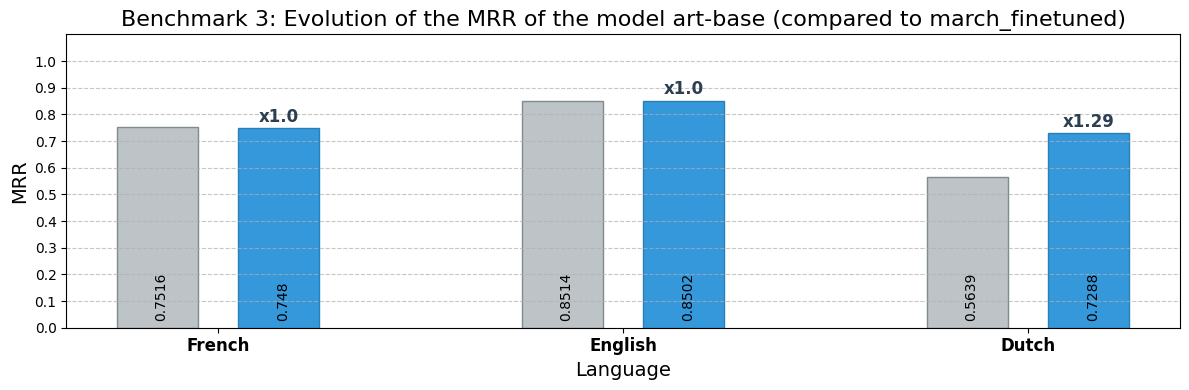

In [54]:
# Reorder the columns model_name such that it follows the order in models_name
plt.figure(figsize=(12, 4))

plt.grid(axis='y', linestyle='--', alpha=0.7)

for langIndex, lang in enumerate(lang_to_label.keys()):

    # Get the data for the current variant and language
    base_result = benchmark3_baseline.loc[benchmark3_baseline["lang"] == lang]["mrr"].values[0]

    art_result = benchmark3.loc[benchmark3["lang"] == lang]["mrr"].values[0]

    plt.bar(
        langIndex - 0.15,
        base_result,
        width=0.2,
        label=baseline_name,
        color="#bdc3c7",
        edgecolor="#7f8c8d"
    )
    # Add the value at the bottom of the bar
    plt.text(
        langIndex - 0.15 + 0.01,
        0.025,
        str(round(base_result, roundFactor)),
        ha='center',
        va='bottom',
        fontsize=10,
        color="black",
        rotation=90
    )

    plt.bar(
        langIndex + 0.15,
        art_result,
        width=0.2,
        label=model_name,
        color="#3498db",
        edgecolor="#2980b9"
    )
    # Add the value at the bottom of the bar
    plt.text(
        langIndex + 0.15 + 0.01,
        0.025,
        str(round(art_result, roundFactor)),
        ha='center',
        va='bottom',
        fontsize=10,
        color="black",
        rotation=90
    )

    # Add a text above the art_result bar
    xDifference = round(art_result/base_result, 2)
    xDifference = f"x{xDifference}"
    plt.text(
        langIndex + 0.15,
        art_result + 0.01,
        xDifference,
        ha='center',
        va='bottom',
        fontsize=12,
        color="#2c3e50",
        fontweight='bold'
    )

plt.xticks(
    np.arange(len(lang_to_label)),
    [lang_to_label[lang] for lang in lang_to_label.keys()],
    fontsize=12,
    fontweight='bold'
)
plt.xlabel("Language", fontsize=14)
plt.ylim(0, 1.1)
plt.ylabel("MRR", fontsize=14)

title = f"Benchmark 3: Evolution of the MRR of the model {model_name}"
if not "basic" in baseline_name:
    title += f" (compared to {baseline_name})"

plt.title(
    title,
    fontsize=16,
)
print(title)

y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)
plt.tight_layout()
plt.savefig(
    os.path.join(figures_path, "benchmark_3_mrr.pdf"),
    dpi=300,
    bbox_inches="tight"
)
print(f"Saved benchmark 3 MRR plot to {os.path.join(figures_path, 'benchmark_3_mrr.pdf')}")
plt.show()